# Asssignment-11-Text Mining

# 1) Extract reviews of any product from ecommerce website like amazon

**Extract reviews of apple-iphone-12-blue-128-gb from flipkart.com**

In [1]:
import json
import ssl
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup

ctx=ssl.create_default_context()
ctx.check_hostname=False
ctx.verify_mode = ssl.CERT_NONE

In [2]:
def get_Soup(url):
    while True:
        req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        try:
            webpage = urlopen(req).read()
            soup =  BeautifulSoup(webpage, 'html.parser')
            return soup
        except:
            pass

In [3]:
def get_review(name,id,pid,lid):

    # reviews's data 
    data ={'Review':[]}
    
    # to read multiple page 
    pg=1
    while True:
        
        # make url with name and id
        url = "https://www.flipkart.com/{}/product-reviews/{}?pid={}&lid={}&marketplace=FLIPKART&page={}".format(name,id,pid,lid,pg)
        #increment of page
        pg+=1
        # retrive soup object
        soup = get_Soup(url)
        
        # retrive next button of page
        next = soup.find('a',class_='_1LKTO3')
        #collect all reviews post
        reviews = soup.find_all('div',class_='_27M-vq')
        # iterate individual review
        for rev in reviews:
            data['Review'].append(rev.find('div', class_="t-ZTKy").div.text.strip())
        # check next page is disable or not
        if next:
            pass
        else:
            df = DataFrame(data)
            df.to_csv('{}.csv'.format(name))
            print('{}.csv file successfully save !'.format(id))
            return 
        time.sleep(10) #sleep for 10 sec to avoid block
        

In [4]:
name="apple-iphone-12-blue-128-gb"
id="itm02853ae92e90a"
pid="MOBFWBYZKPTZF9VG"
lid="LSTMOBFWBYZKPTZF9VG6GMIFT"

get_review(name,id,pid,lid)

# 2) Perform emotion mining

In [5]:
import pandas as pd
import numpy as np
import string # special operations on strings
# !pip install spacy
import spacy # language models
import nltk
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
# !pip install wordcloud
from wordcloud import WordCloud
%matplotlib inline

In [6]:
df = pd.read_csv('apple-iphone-12-blue-128-gb.csv', encoding='latin1')
df

,Unnamed: 0,Review
0,0,"Delightful phone, the phone is just a peice of..."
1,1,iPhone 6S Plus 64GB -> iPhone 12 128GBMy 2nd i...
2,2,Green colour is charming and priceless No w...
3,3,Night mode is simply amazing and give you a cl...
4,4,The Product is fantastic with great nay awesom...
...,...,...
549,549,Excellent phone with excellent flipkart servic...
550,550,Wohoo... Uphraded from Iphone 8 . Stylish It f...
551,551,Excellent phone but Costly!READ MORE
552,552,Excellent performance. Sleek looking and great...


In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Review
0,"Delightful phone, the phone is just a peice of..."
1,iPhone 6S Plus 64GB -> iPhone 12 128GBMy 2nd i...
2,Green colour is charming and priceless No w...
3,Night mode is simply amazing and give you a cl...
4,The Product is fantastic with great nay awesom...
...,...
549,Excellent phone with excellent flipkart servic...
550,Wohoo... Uphraded from Iphone 8 . Stylish It f...
551,Excellent phone but Costly!READ MORE
552,Excellent performance. Sleek looking and great...


In [8]:
#check how many reviews we have
df.shape

(554, 1)

In [9]:
#check some reviews
pd.set_option("display.max_colwidth",None) # see full text
df.head()

,Review
0,"Delightful phone, the phone is just a peice of art, sleek, eye catchy, super fast and got everything u need...best one availableREAD MORE"
1,"iPhone 6S Plus 64GB -> iPhone 12 128GBMy 2nd iPhone, upgraded after 5 years.Gorgeous display, stunning new blue colour, excellent camera, best hardware-software combination, thatâs how I would describe iPhone 12 as a package. ðEven though my previous iPhone had a 5.5â display and this one has 6.1â display, its overall body size is much smaller. Had to get used to it initially ðOpening/closing/loading of apps is fast. No issues there. Video playback on this screen looks gorgeous. Took...READ MORE"
2,Green colour is charming and priceless No weight this iPhone Totally mind blowing Battery backup is not best of best but overall hall day backup normally usage After update new version battery backup superb hall day easily use it Camera quality awesome night mode superb Display and 4K video look like live scene Continue live internet use 7 or 8 hour battery backupREAD MORE
3,Night mode is simply amazing and give you a clear and crisp image even when you are in dark.READ MORE
4,"The Product is fantastic with great nay awesome camera.Battery management is good but still could be better.Display is very beautiful and treat to watch videos.Design is good, gives vintage iphone kind of look.READ MORE"


In [10]:
import re
def clean_tweets(tweets):
    tweets = re.sub('@[A-Za-z0–9]+', '', tweets) #Removing tag(@)
    tweets = re.sub('#', '', tweets) # Removing hashtag(#)
    tweets = re.sub('RT[\s]+', '', tweets) # Removing Retweets
    tweets = re.sub('https?:\/\/\S+', '', tweets) # Removing links
    tweets = re.sub('<[^<]+?>', '', tweets) #remove html tags
    tweets = re.sub('\n', '', tweets) # remove new lines
    tweets = re.sub('&amp;', '', tweets) #remove &amp
    tweets = re.sub('READ MORE', '', tweets) #remove READ MORE
    return tweets
 
df.Review = df.Review.apply(clean_tweets)

In [11]:
#Cleaning and removing punctuations

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df.Review= df.Review.apply(lambda x: cleaning_punctuations(x))
df.tail()

,Review
549,Excellent phone with excellent flipkart service
550,Wohoo Uphraded from Iphone 8 Stylish It feels nice in hand
551,Excellent phone but Costly
552,Excellent performance Sleek looking and great specifications
553,Awesome Display Nice Camera Smooth Performance ð


In [12]:
# Cleaning and removing Numeric numbers

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df.Review = df.Review.apply(lambda x: cleaning_numbers(x))
df.Review.tail()

549                 Excellent phone with excellent flipkart service
550      Wohoo Uphraded from Iphone   Stylish It feels nice in hand
551                                      Excellent phone but Costly
552    Excellent performance Sleek looking and great specifications
553             Awesome Display Nice Camera Smooth Performance ð
Name: Review, dtype: object

In [13]:
#check some tweets
pd.set_option("display.max_colwidth",-1) # see full text
df.sample(10)

<ipython-input-13-51651baa4346>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth",-1) # see full text


,Review
510,Wow simply wow my second iPhone after iPhone XS Very much happy for it
479,I just loved it after a long fime I switched to apple and it again win my heart by its performance and very user friendly phone it isIf u have budget above k then go for it
223,Black beast amazing mobile
96,Itâs just awesomeloved it
188,Of course youd have watched all the review videos etc The only gripe could be the Hz display but trust me youll hardly notice it and it never gets in the way of the incredible experience Apple phones provide
58,Everything is superb and the most I liked in this phone is its Design and Camera and coming on battery life it is also perfect for me lasted for more than one day as I mostly use my phone for surfing and sometimes for watching video Really â¤ï¸ it
102,Pros Great PerformanceGreat CameraGreat sound quality for callsGreat Display Finally OLED in the non pro phonesCons Battery life Although iOS is very optimised still could have been a little betterPrice Not value for money as compared to other android phonesFor existing apple users dont update if youre coming from iPhone X or series Wont feel much of an updateFor others buy it if youre looking for a change from Android or if youre looking to get into the apple
105,My first iPhone I love it
241,Nice mobile from apple
458,Good product and excellent service ð


In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [15]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop)]))
df.head()

,Review
0,Delightful phone phone peice art sleek eye catchy super fast got everything u needbest one available
1,iPhone S Plus GB iPhone GBMy nd iPhone upgraded yearsGorgeous display stunning new blue colour excellent camera best hardwaresoftware combination thatâs I would describe iPhone package ðEven though previous iPhone â display one â display overall body size much smaller Had get used initially ðOpeningclosingloading apps fast No issues Video playback screen looks gorgeous Took
2,Green colour charming priceless No weight iPhone Totally mind blowing Battery backup best best overall hall day backup normally usage After update new version battery backup superb hall day easily use Camera quality awesome night mode superb Display K video look like live scene Continue live internet use hour battery backup
3,Night mode simply amazing give clear crisp image even dark
4,The Product fantastic great nay awesome cameraBattery management good still could betterDisplay beautiful treat watch videosDesign good gives vintage iphone kind look


In [16]:
df = [x.strip() for x in df.Review] # remove both the leading and the trailing characters
df = [x for x in df if x] # removes empty strings, because they are considered in Python as False

In [17]:
# !pip install afinn
from afinn import Afinn

In [18]:
afn = Afinn()

In [19]:
#compute scores (polarity) and labels
scores = [afn.score(Review) for Review in df]
sentiment = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in scores]

In [20]:
# dataframe creation
sent_df = pd.DataFrame()
sent_df['Review'] =  df
sent_df['Scores'] = scores
sent_df['Sentiments'] = sentiment

In [21]:
sent_df

,Review,Scores,Sentiments
0,Delightful phone phone peice art sleek eye catchy super fast got everything u needbest one available,6.0,positive
1,iPhone S Plus GB iPhone GBMy nd iPhone upgraded yearsGorgeous display stunning new blue colour excellent camera best hardwaresoftware combination thatâs I would describe iPhone package ðEven though previous iPhone â display one â display overall body size much smaller Had get used initially ðOpeningclosingloading apps fast No issues Video playback screen looks gorgeous Took,9.0,positive
2,Green colour charming priceless No weight iPhone Totally mind blowing Battery backup best best overall hall day backup normally usage After update new version battery backup superb hall day easily use Camera quality awesome night mode superb Display K video look like live scene Continue live internet use hour battery backup,26.0,positive
3,Night mode simply amazing give clear crisp image even dark,5.0,positive
4,The Product fantastic great nay awesome cameraBattery management good still could betterDisplay beautiful treat watch videosDesign good gives vintage iphone kind look,22.0,positive
...,...,...,...
549,Excellent phone excellent flipkart service,6.0,positive
550,Wohoo Uphraded Iphone Stylish It feels nice hand,3.0,positive
551,Excellent phone Costly,1.0,positive
552,Excellent performance Sleek looking great specifications,6.0,positive


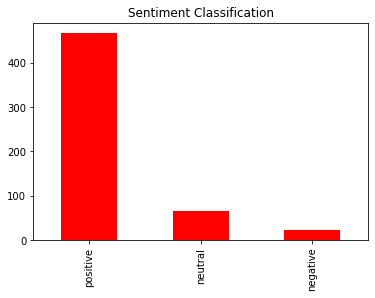

In [22]:
# let's see how many ratio of sentiment
sent_df.Sentiments.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classification')
plt.show()

In [23]:
# how many words are in the sentence?
sent_df['Word_Count'] = sent_df['Review'].str.split().apply(len)
sent_df.head(10)

,Review,Scores,Sentiments,Word_Count
0,Delightful phone phone peice art sleek eye catchy super fast got everything u needbest one available,6.0,positive,16
1,iPhone S Plus GB iPhone GBMy nd iPhone upgraded yearsGorgeous display stunning new blue colour excellent camera best hardwaresoftware combination thatâs I would describe iPhone package ðEven though previous iPhone â display one â display overall body size much smaller Had get used initially ðOpeningclosingloading apps fast No issues Video playback screen looks gorgeous Took,9.0,positive,55
2,Green colour charming priceless No weight iPhone Totally mind blowing Battery backup best best overall hall day backup normally usage After update new version battery backup superb hall day easily use Camera quality awesome night mode superb Display K video look like live scene Continue live internet use hour battery backup,26.0,positive,51
3,Night mode simply amazing give clear crisp image even dark,5.0,positive,10
4,The Product fantastic great nay awesome cameraBattery management good still could betterDisplay beautiful treat watch videosDesign good gives vintage iphone kind look,22.0,positive,22
5,Best ever delivery flipkart got phone less hrs really impressed delivery first ever ios device im really impressed features camera quality awesome stereo speaker oled display awesome warmth feeling making display little bit yellow battery backup awesome,26.0,positive,37
6,Best phone ever My first iphone Great awesome experience Awesome Camera Awesome securityð features Great processing capabilitiesAnd many â¤ð¥°ð¥°ð¥°â¤,21.0,positive,19
7,So far good Itâs dream iPhone decade Finally came true iPhone Previously owned Samsung S plus competing android say likes dislikesLikes OS really fluid Security features like facial recognition app installation etc Little nuances like ringtone sound reduction automatically I see mobile Camera good though still equal Samsung canât say extraordinary Facial unlock really quick G ready,17.0,positive,57
8,Upgraded iPhone XNoticed major differences instantly Lot difference camera pictures The best camera model iPhone far Light weight feels handy one hand use Screen brightness better iPhone XNot mentioning aspects like performance speed already close perfect Battery one complete day constant usage WhatsApp safari emails spotify music youtube videos,11.0,positive,49
9,After long time samsung user switched iphone iphone thoroughly enjoying Ios much polished android users surely enjoy using ios Battry lasts day moderate use Performance usability camera sound display everything top notch Icing cake apple car play much usable android autoð¬ð¬,8.0,positive,41


In [24]:
sent_df['Scores'].describe()

count    554.000000
mean     4.516245  
std      4.306174  
min     -9.000000  
25%      3.000000  
50%      3.000000  
75%      6.000000  
max      26.000000 
Name: Scores, dtype: float64

/home/starlord/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

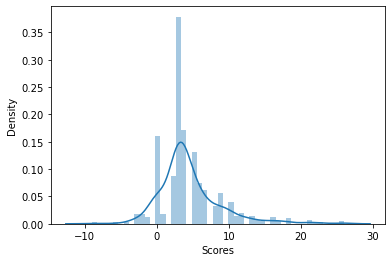

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['Scores'])

In [26]:
sent_df['index']=range(0,len(sent_df))

<AxesSubplot:xlabel='index', ylabel='Scores'>

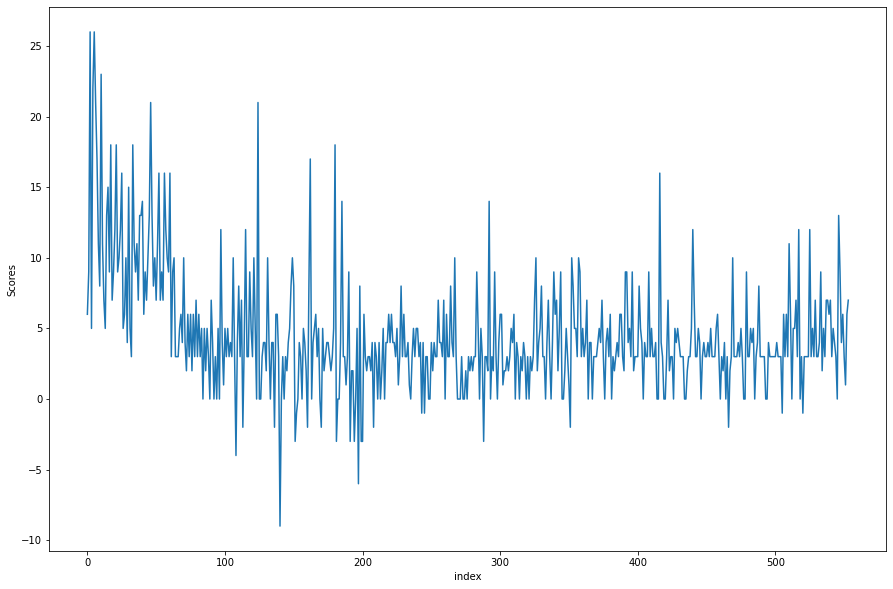

In [27]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='Scores',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='Word_Count', ylabel='Scores'>

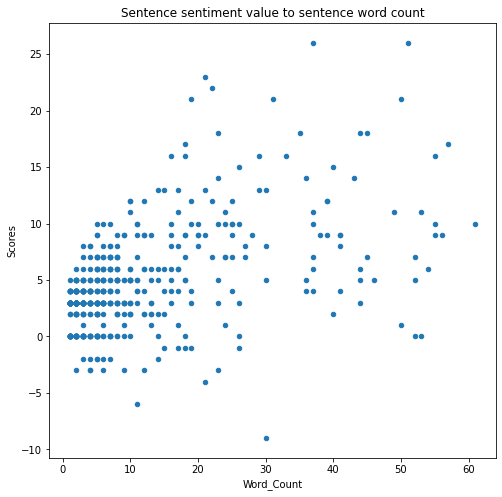

In [28]:
sent_df.plot.scatter(x='Word_Count', y='Scores', figsize=(8,8), title='Sentence sentiment value to sentence word count')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/starlord/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


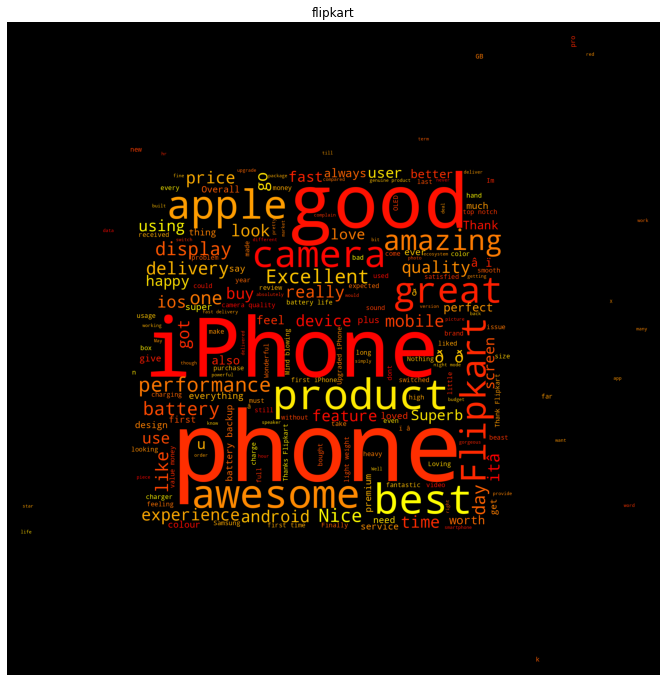

In [29]:
# check which word is used most by Reviewers
 
# setting up stop words 
nltk.download('stopwords')
stpwrd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all tweets text
allWords = ' '.join([tweets for tweets in sent_df['Review']])
 
# # Image we will use for Word's cloud mask
# from google.colab import files
# uploaded = files.upload()
 
# # by default files are uploaded in /content folder 
# import cv2
# image = cv2.imread('/content/'+next(iter(uploaded))) 
# FLipkart = image

#!pip install opencv-python
import cv2
image = cv2.imread('images/flipkart.jpg') 
Flipkart = image

# word cloud
def word_cloud(data, title, mask=None):
    Cloud = WordCloud(scale=3,
                      random_state=21,
                      colormap='autumn',
                      mask=mask,
                      stopwords=stpwrd,
                      collocations=True,).generate(data)
    plt.figure(figsize=(20,12))
    plt.imshow(Cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
 
# plot it
word_cloud(allWords, 'flipkart', mask=Flipkart)